In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# establish sns style
sns.set_style("darkgrid")
sns.set_context("talk")
sns.set(rc={'figure.figsize': (16,8)})

In [3]:
# read guttmacher institute data
ab = pd.read_csv("data/guttmacher_institute_abortion_data_2020.csv")
bc = pd.read_csv("data/guttmacher_institute_contraceptive_data_2017.csv")

## Abortion

In [4]:
# examine table
ab.head()

,measure_name,datum,state_id,state_name
0,"% change in abortion rate, 2017-2020",-6.0,AL,Alabama
1,"% change in abortion rate, 2017-2020",0.0,AK,Alaska
2,"% change in abortion rate, 2017-2020",1.0,AZ,Arizona
3,"% change in abortion rate, 2017-2020",2.0,AR,Arkansas
4,"% change in abortion rate, 2017-2020",17.0,CA,California


### Restructure Data

In [5]:
# drop unnecessary column
ab.drop('state_id', axis=1)

,measure_name,datum,state_name
0,"% change in abortion rate, 2017-2020",-6.0,Alabama
1,"% change in abortion rate, 2017-2020",0.0,Alaska
2,"% change in abortion rate, 2017-2020",1.0,Arizona
3,"% change in abortion rate, 2017-2020",2.0,Arkansas
4,"% change in abortion rate, 2017-2020",17.0,California
...,...,...,...
454,"No. of abortions, by state of residence",23390.0,Virginia
455,"No. of abortions, by state of residence",17910.0,Washington
456,"No. of abortions, by state of residence",1780.0,West Virginia
457,"No. of abortions, by state of residence",8290.0,Wisconsin


In [6]:
# reshape table
ab_pivot=ab.pivot_table(index='state_name', columns='measure_name', values='datum', aggfunc=np.sum)
ab_pivot.head()

measure_name,"% change in abortion rate, 2017-2020","% of all U.S. abortions, by state of occurrence",% of residents obtaining abortions who traveled out of state for care,"No. of abortions per 1,000 women aged 15-44, by state of occurrence","No. of abortions per 1,000 women aged 15-44, by state of residence","No. of abortions, by state of occurrence","No. of abortions, by state of residence"
state_name,,,,,,,
Alabama,-6.0,0.6,0.47,6.0,9.5,17100.0,9060.0
Alaska,0.0,0.1,0.07,8.6,9.2,3720.0,1320.0
Arizona,1.0,1.4,0.06,9.3,9.7,39960.0,13820.0
Arkansas,2.0,0.3,0.37,5.6,7.8,9750.0,4510.0
California,17.0,16.6,0.00,19.2,19.0,462180.0,152400.0


In [7]:
# flatten abortion table
ab_pivot.rename_axis(None, axis=1)
ab_df=ab_pivot.rename_axis(None, axis=1).reset_index()
ab_df.head()

,state_name,"% change in abortion rate, 2017-2020","% of all U.S. abortions, by state of occurrence",% of residents obtaining abortions who traveled out of state for care,"No. of abortions per 1,000 women aged 15-44, by state of occurrence","No. of abortions per 1,000 women aged 15-44, by state of residence","No. of abortions, by state of occurrence","No. of abortions, by state of residence"
0,Alabama,-6.0,0.6,0.47,6.0,9.5,17100.0,9060.0
1,Alaska,0.0,0.1,0.07,8.6,9.2,3720.0,1320.0
2,Arizona,1.0,1.4,0.06,9.3,9.7,39960.0,13820.0
3,Arkansas,2.0,0.3,0.37,5.6,7.8,9750.0,4510.0
4,California,17.0,16.6,0.00,19.2,19.0,462180.0,152400.0


In [8]:
# rename state_name col for merging later
ab_df.rename(columns={'state_name':'state'}, inplace=True)
ab_df.head()

,state,"% change in abortion rate, 2017-2020","% of all U.S. abortions, by state of occurrence",% of residents obtaining abortions who traveled out of state for care,"No. of abortions per 1,000 women aged 15-44, by state of occurrence","No. of abortions per 1,000 women aged 15-44, by state of residence","No. of abortions, by state of occurrence","No. of abortions, by state of residence"
0,Alabama,-6.0,0.6,0.47,6.0,9.5,17100.0,9060.0
1,Alaska,0.0,0.1,0.07,8.6,9.2,3720.0,1320.0
2,Arizona,1.0,1.4,0.06,9.3,9.7,39960.0,13820.0
3,Arkansas,2.0,0.3,0.37,5.6,7.8,9750.0,4510.0
4,California,17.0,16.6,0.00,19.2,19.0,462180.0,152400.0


### EDA

In [9]:
# which states have the greatest pct of all US abortions?
ab_pct=ab_df[['state','% of all U.S. abortions, by state of occurrence']].sort_values(by='% of all U.S. abortions, by state of occurrence', ascending=False)
ab_pct.head()

,state,"% of all U.S. abortions, by state of occurrence"
4,California,16.6
32,New York,11.9
9,Florida,8.3
43,Texas,6.2
13,Illinois,5.7


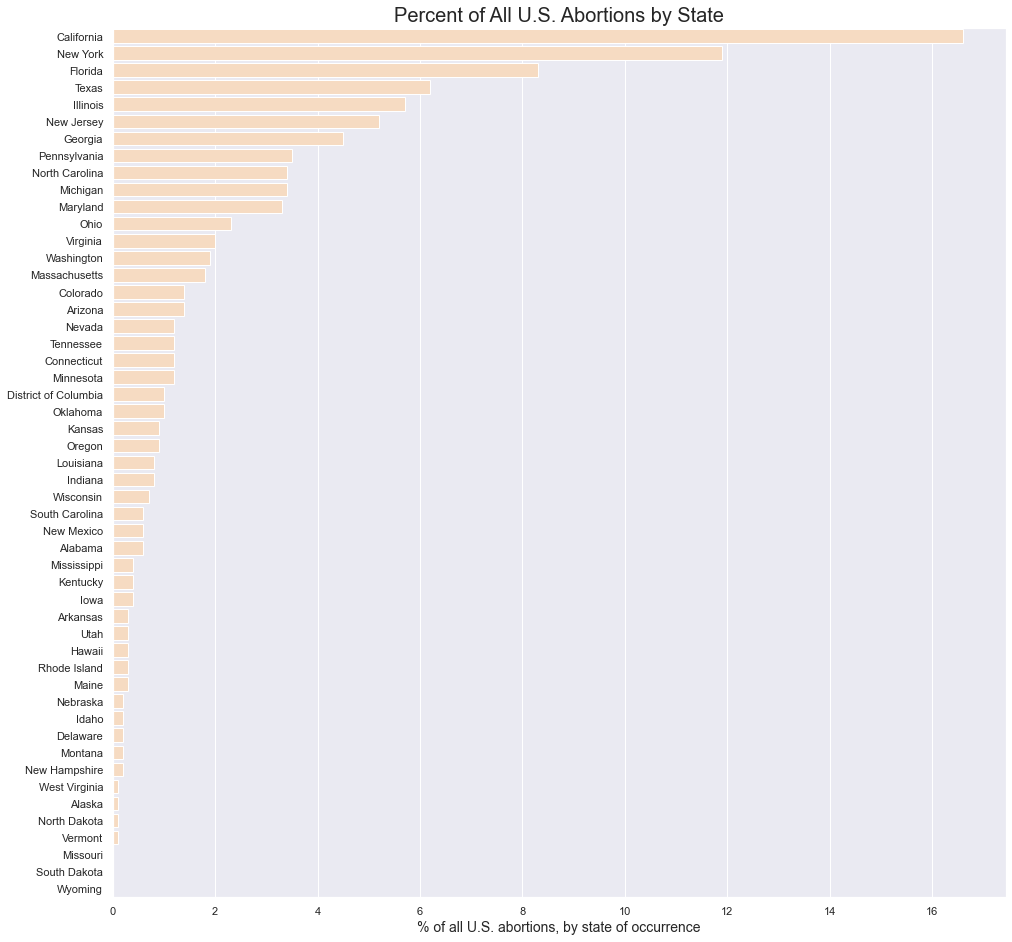

In [10]:
# visualize pct of all US abortions by state
sns.set(rc={'figure.figsize': (16,16)})
sns.barplot(data=ab_pct, y='state', x='% of all U.S. abortions, by state of occurrence', color='peachpuff')
plt.title("Percent of All U.S. Abortions by State", size=20)
plt.xlabel("% of all U.S. abortions, by state of occurrence", size=14)
plt.ylabel(None)
plt.show()

In [11]:
# which states have the greatest pct of people traveling out of state for an abortion?
oos_ab_pct=ab_df[['state','% of residents obtaining abortions who traveled out of state for care']].sort_values(by='% of residents obtaining abortions who traveled out of state for care', ascending=False)
oos_ab_pct.head()

,state,% of residents obtaining abortions who traveled out of state for care
25,Missouri,0.99
50,Wyoming,0.88
41,South Dakota,0.84
40,South Carolina,0.57
48,West Virginia,0.52


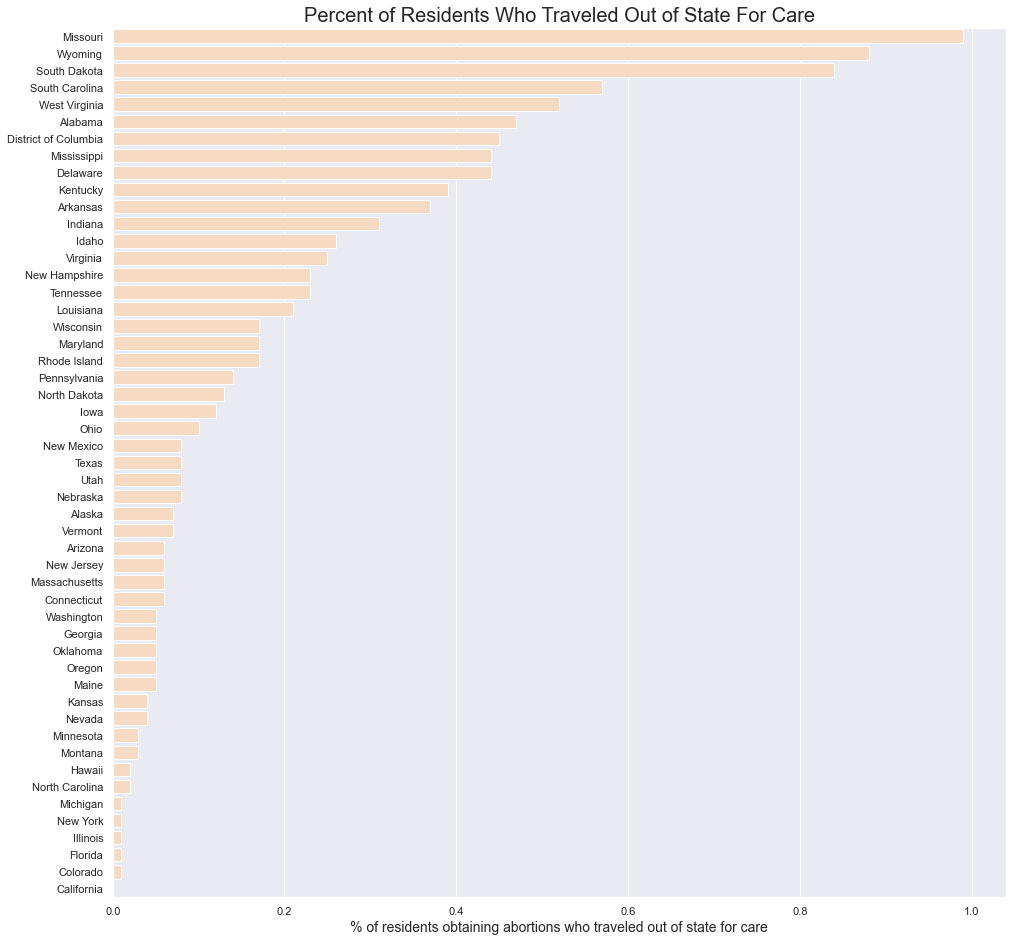

In [12]:
# visualize pct of all US abortions by state
sns.set(rc={'figure.figsize': (16,16)})
sns.barplot(data=oos_ab_pct, y='state', x='% of residents obtaining abortions who traveled out of state for care', color='peachpuff')
plt.title("Percent of Residents Who Traveled Out of State For Care", size=20)
plt.ylabel(None)
plt.xlabel("% of residents obtaining abortions who traveled out of state for care", size=14)
plt.show()
# a butterfly chart would be great for these two charts

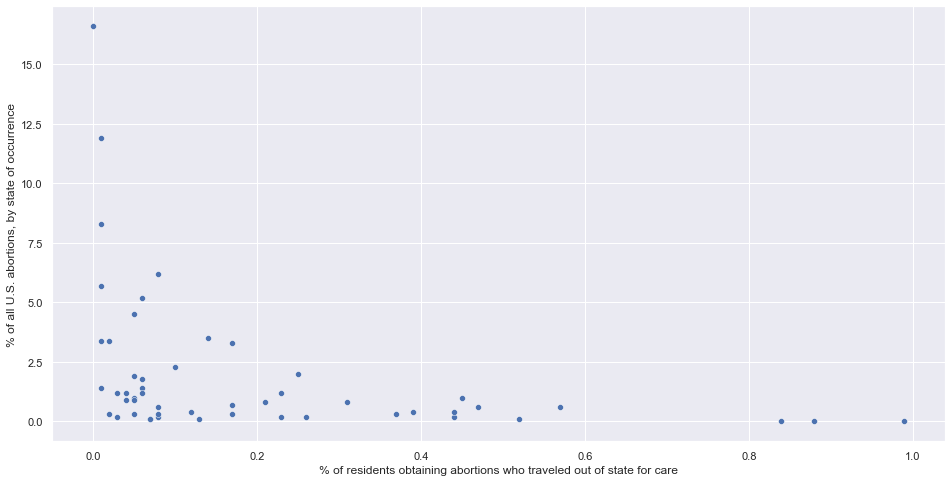

In [13]:
# what is the relationship between the variables above?
sns.set(rc={'figure.figsize': (16,8)})
ax=sns.scatterplot(data=ab_df, x='% of residents obtaining abortions who traveled out of state for care', y='% of all U.S. abortions, by state of occurrence')
ax;
# as expected, an inverse relationship

## Birth Control

In [14]:
# examine second table
bc.head()

,measure_name,datum,state_id,state_name
0,% of women aged 18-49 using contraceptives,71.5,AL,Alabama
1,% of women aged 18-49 using contraceptives,76.5,AK,Alaska
2,% of women aged 18-49 using contraceptives,64.2,AZ,Arizona
3,% of women aged 18-49 using contraceptives,NaN,AR,Arkansas
4,% of women aged 18-49 using contraceptives,72.0,CA,California


### Restructure Data

In [15]:
# drop unnecessary column
bc.drop('state_id', axis=1)

,measure_name,datum,state_name
0,% of women aged 18-49 using contraceptives,71.5,Alabama
1,% of women aged 18-49 using contraceptives,76.5,Alaska
2,% of women aged 18-49 using contraceptives,64.2,Arizona
3,% of women aged 18-49 using contraceptives,NaN,Arkansas
4,% of women aged 18-49 using contraceptives,72.0,California
...,...,...,...
607,% of women at risk of unintended pregnancy not...,22.1,Virginia
608,% of women at risk of unintended pregnancy not...,NaN,Washington
609,% of women at risk of unintended pregnancy not...,25.6,West Virginia
610,% of women at risk of unintended pregnancy not...,28.9,Wisconsin


In [16]:
# reshape table
bc_pivot=bc.pivot_table(index='state_name', columns='measure_name', values='datum', aggfunc=np.sum)
bc_pivot.head()

measure_name,% of women aged 18-49 using contraceptives,% of women at risk of unintended pregnancy not using a contraceptive method,% of women at risk of unintended pregnancy relying on condoms,% of women at risk of unintended pregnancy relying on female sterilization,% of women at risk of unintended pregnancy relying on male sterilization,% of women at risk of unintended pregnancy relying on other methods of contraception,% of women at risk of unintended pregnancy relying on other non-LARC hormonal methods,% of women at risk of unintended pregnancy relying on the IUD,% of women at risk of unintended pregnancy relying on the contraceptive implant,% of women at risk of unintended pregnancy relying on the pill,% of women at risk of unintended pregnancy relying on withdrawal,% of women at risk of unintended pregnancy using contraception
state_name,,,,,,,,,,,,
Alabama,71.5,24.1,17.1,19.3,4.7,4.2,0.0,5.4,0.0,20.6,0.0,75.9
Alaska,76.5,17.3,24.2,10.6,0.0,0.0,0.0,20.6,0.0,10.2,0.0,82.7
Arizona,64.2,32.6,16.5,12.3,4.1,6.3,0.0,9.3,2.2,14.7,1.1,67.4
Arkansas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
California,72.0,23.4,22.7,9.1,1.3,5.4,3.1,9.4,3.5,19.7,2.3,76.6


In [17]:
# flatten birth control table
bc_pivot.rename_axis(None, axis=1)
bc_df=bc_pivot.rename_axis(None, axis=1).reset_index()
bc_df.head()

,state_name,% of women aged 18-49 using contraceptives,% of women at risk of unintended pregnancy not using a contraceptive method,% of women at risk of unintended pregnancy relying on condoms,% of women at risk of unintended pregnancy relying on female sterilization,% of women at risk of unintended pregnancy relying on male sterilization,% of women at risk of unintended pregnancy relying on other methods of contraception,% of women at risk of unintended pregnancy relying on other non-LARC hormonal methods,% of women at risk of unintended pregnancy relying on the IUD,% of women at risk of unintended pregnancy relying on the contraceptive implant,% of women at risk of unintended pregnancy relying on the pill,% of women at risk of unintended pregnancy relying on withdrawal,% of women at risk of unintended pregnancy using contraception
0,Alabama,71.5,24.1,17.1,19.3,4.7,4.2,0.0,5.4,0.0,20.6,0.0,75.9
1,Alaska,76.5,17.3,24.2,10.6,0.0,0.0,0.0,20.6,0.0,10.2,0.0,82.7
2,Arizona,64.2,32.6,16.5,12.3,4.1,6.3,0.0,9.3,2.2,14.7,1.1,67.4
3,Arkansas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,California,72.0,23.4,22.7,9.1,1.3,5.4,3.1,9.4,3.5,19.7,2.3,76.6


In [18]:
# rename state_name col for merging later
bc_df.rename(columns={'state_name':'state'}, inplace=True)
bc_df.head()

,state,% of women aged 18-49 using contraceptives,% of women at risk of unintended pregnancy not using a contraceptive method,% of women at risk of unintended pregnancy relying on condoms,% of women at risk of unintended pregnancy relying on female sterilization,% of women at risk of unintended pregnancy relying on male sterilization,% of women at risk of unintended pregnancy relying on other methods of contraception,% of women at risk of unintended pregnancy relying on other non-LARC hormonal methods,% of women at risk of unintended pregnancy relying on the IUD,% of women at risk of unintended pregnancy relying on the contraceptive implant,% of women at risk of unintended pregnancy relying on the pill,% of women at risk of unintended pregnancy relying on withdrawal,% of women at risk of unintended pregnancy using contraception
0,Alabama,71.5,24.1,17.1,19.3,4.7,4.2,0.0,5.4,0.0,20.6,0.0,75.9
1,Alaska,76.5,17.3,24.2,10.6,0.0,0.0,0.0,20.6,0.0,10.2,0.0,82.7
2,Arizona,64.2,32.6,16.5,12.3,4.1,6.3,0.0,9.3,2.2,14.7,1.1,67.4
3,Arkansas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,California,72.0,23.4,22.7,9.1,1.3,5.4,3.1,9.4,3.5,19.7,2.3,76.6


In [19]:
# numerous 0 or n/a values - what to do with them?

## Earnings

In [20]:
# read xlsx file
earnings = pd.ExcelFile("data/womens-earnings-tables-2020.xlsx")

# parse the third sheet
earnings_by_state = earnings.parse(2)

In [21]:
# examine table
earnings_by_state.head()

,"Table 3. Median usual weekly earnings of full-time wage and salary workers, by state, 2020 annual averages",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,State,Total,NaN,NaN,Women,NaN,NaN,Men,NaN,NaN,Women's\nearnings\nas a\npercentage\nof men's
2,NaN,Number\nof\nworkers\n(in\nthousands),Median\nweekly\nearnings,Standard\nerror\nof\nmedian,Number\nof\nworkers\n(in\nthousands),Median\nweekly\nearnings,Standard\nerror\nof\nmedian,Number\nof\nworkers\n(in\nthousands),Median\nweekly\nearnings,Standard\nerror\nof\nmedian,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United States,110387,984,2,49476,891,3,60911,1082,5,82.3


### Restructure Data

In [22]:
# remove nulls
earnings_by_state=earnings_by_state.dropna()
earnings_by_state.head()

,"Table 3. Median usual weekly earnings of full-time wage and salary workers, by state, 2020 annual averages",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
4,United States,110387,984,2,49476,891,3,60911,1082,5,82.3
6,Alabama,1628,887,15,745,791,21,884,978,29,80.9
7,Alaska,238,1021,21,106,913,27,132,1128,27,80.9
8,Arizona,2384,932,16,1073,856,28,1312,991,15,86.4
9,Arkansas,995,849,16,443,771,17,552,917,21,84.1


In [23]:
# reestablish index
earnings_by_state=earnings_by_state.reset_index(drop=True)
earnings_by_state.head()

,"Table 3. Median usual weekly earnings of full-time wage and salary workers, by state, 2020 annual averages",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,United States,110387,984,2,49476,891,3,60911,1082,5,82.3
1,Alabama,1628,887,15,745,791,21,884,978,29,80.9
2,Alaska,238,1021,21,106,913,27,132,1128,27,80.9
3,Arizona,2384,932,16,1073,856,28,1312,991,15,86.4
4,Arkansas,995,849,16,443,771,17,552,917,21,84.1


In [24]:
# rename columns

earnings_by_state.columns=['state', 'total_workers_in_thousands', 'total_median_weekly_earnings', 'total_se_of_median', 
                      'women_workers_in_thousands', 'women_median_weekly_earnings', 'women_se_of_median', 
                      'men_workers_in_thousands', 'men_median_weekly_earnings', 'men_se_of_median', 'women_earnings_pct_of_men']
earnings_by_state.head()

,state,total_workers_in_thousands,total_median_weekly_earnings,total_se_of_median,women_workers_in_thousands,women_median_weekly_earnings,women_se_of_median,men_workers_in_thousands,men_median_weekly_earnings,men_se_of_median,women_earnings_pct_of_men
0,United States,110387,984,2,49476,891,3,60911,1082,5,82.3
1,Alabama,1628,887,15,745,791,21,884,978,29,80.9
2,Alaska,238,1021,21,106,913,27,132,1128,27,80.9
3,Arizona,2384,932,16,1073,856,28,1312,991,15,86.4
4,Arkansas,995,849,16,443,771,17,552,917,21,84.1


In [25]:
# remove se_of_median columns - do they add value to the analysis?

earnings_by_state=earnings_by_state.drop(['total_se_of_median','women_se_of_median', 'men_se_of_median'], axis=1)
earnings_by_state.head()

,state,total_workers_in_thousands,total_median_weekly_earnings,women_workers_in_thousands,women_median_weekly_earnings,men_workers_in_thousands,men_median_weekly_earnings,women_earnings_pct_of_men
0,United States,110387,984,49476,891,60911,1082,82.3
1,Alabama,1628,887,745,791,884,978,80.9
2,Alaska,238,1021,106,913,132,1128,80.9
3,Arizona,2384,932,1073,856,1312,991,86.4
4,Arkansas,995,849,443,771,552,917,84.1


In [26]:
# create new column: pct women in workforce
earnings_by_state['pct_women_in_workforce']=(earnings_by_state['women_workers_in_thousands']/earnings_by_state['total_workers_in_thousands'])*100
earnings_by_state.head()

,state,total_workers_in_thousands,total_median_weekly_earnings,women_workers_in_thousands,women_median_weekly_earnings,men_workers_in_thousands,men_median_weekly_earnings,women_earnings_pct_of_men,pct_women_in_workforce
0,United States,110387,984,49476,891,60911,1082,82.3,44.820495
1,Alabama,1628,887,745,791,884,978,80.9,45.761671
2,Alaska,238,1021,106,913,132,1128,80.9,44.537815
3,Arizona,2384,932,1073,856,1312,991,86.4,45.008389
4,Arkansas,995,849,443,771,552,917,84.1,44.522613


### Data Validation

In [27]:
earnings_by_state.dtypes

state                           object
total_workers_in_thousands      object
total_median_weekly_earnings    object
women_workers_in_thousands      object
women_median_weekly_earnings    object
men_workers_in_thousands        object
men_median_weekly_earnings      object
women_earnings_pct_of_men       object
pct_women_in_workforce          object
dtype: object

In [28]:
earnings_by_state['total_workers_in_thousands']=pd.to_numeric(earnings_by_state['total_workers_in_thousands'])
earnings_by_state['total_median_weekly_earnings']=pd.to_numeric(earnings_by_state['total_median_weekly_earnings'])
earnings_by_state['women_workers_in_thousands']=pd.to_numeric(earnings_by_state['women_workers_in_thousands'])
earnings_by_state['women_median_weekly_earnings']=pd.to_numeric(earnings_by_state['women_median_weekly_earnings'])
earnings_by_state['men_workers_in_thousands']=pd.to_numeric(earnings_by_state['men_workers_in_thousands'])
earnings_by_state['men_median_weekly_earnings']=pd.to_numeric(earnings_by_state['men_median_weekly_earnings'])
earnings_by_state['women_earnings_pct_of_men']=pd.to_numeric(earnings_by_state['women_earnings_pct_of_men'])

In [29]:
earnings_by_state.dtypes

state                            object
total_workers_in_thousands        int64
total_median_weekly_earnings      int64
women_workers_in_thousands        int64
women_median_weekly_earnings      int64
men_workers_in_thousands          int64
men_median_weekly_earnings        int64
women_earnings_pct_of_men       float64
pct_women_in_workforce           object
dtype: object

### EDA

In [30]:
# states with greatest pay equality
top=earnings_by_state[['state','women_earnings_pct_of_men']].sort_values(by='women_earnings_pct_of_men', ascending=False)
top.head(10)

# wow Connecticut

,state,women_earnings_pct_of_men
7,Connecticut,97.0
5,California,87.6
32,New Mexico,87.5
44,Texas,87.0
50,Wisconsin,86.5
3,Arizona,86.4
21,Maryland,86.1
24,Minnesota,85.8
9,District of Columbia,85.6
40,Rhode Island,85.5


In [31]:
# states with least pay equality
bottom=earnings_by_state[['state','women_earnings_pct_of_men']].sort_values(by='women_earnings_pct_of_men', ascending=True)
bottom.head(10)

,state,women_earnings_pct_of_men
45,Utah,72.7
19,Louisiana,74.2
51,Wyoming,75.2
13,Idaho,75.7
20,Maine,76.6
18,Kentucky,76.8
25,Mississippi,76.9
15,Indiana,77.0
41,South Carolina,77.6
8,Delaware,77.9


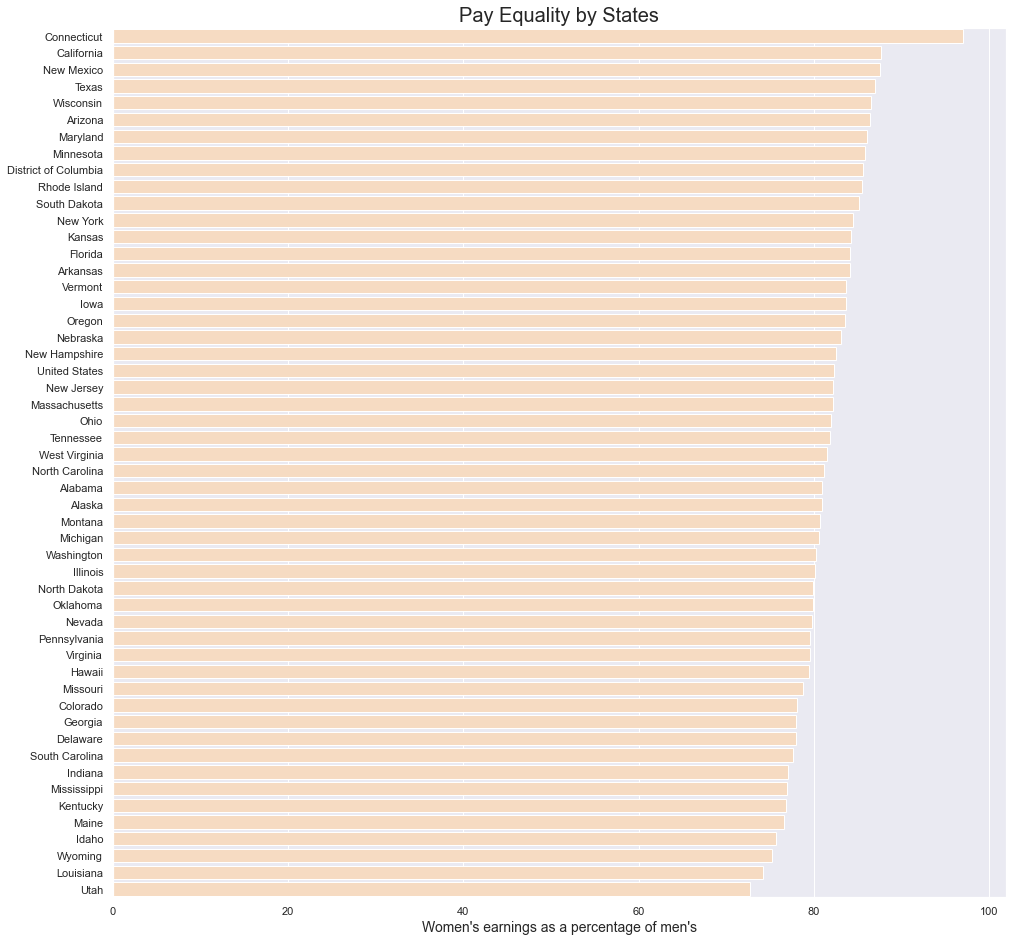

In [32]:
# visualize pay equality by state
sns.set(rc={'figure.figsize': (16,16)})
sns.barplot(data=top, y='state', x='women_earnings_pct_of_men', color='peachpuff')
plt.title("Pay Equality by States", size=20)
plt.xlabel("Women's earnings as a percentage of men's", size=14)
plt.ylabel(None)
plt.show()

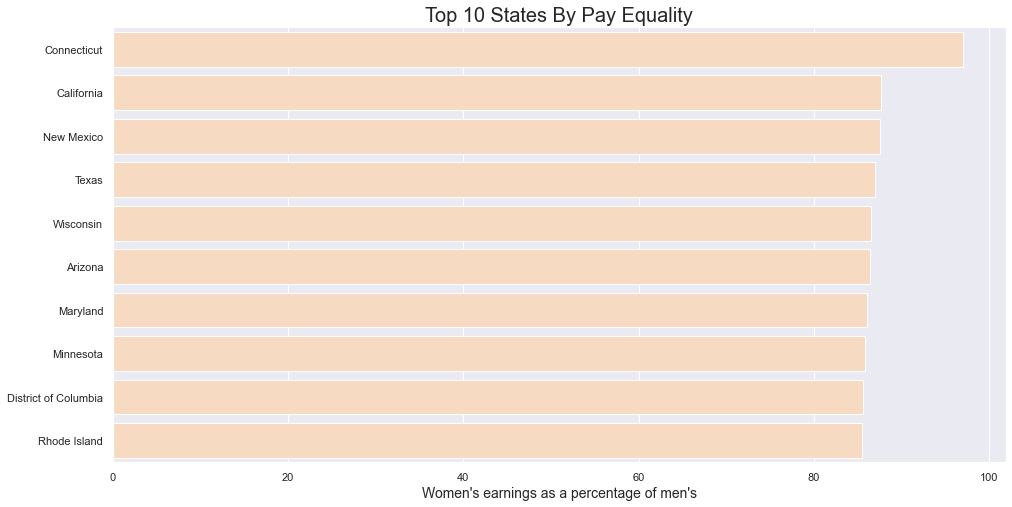

In [33]:
# visualize top 10 states by pay equality
sns.set_style("darkgrid")
sns.set_context("talk")
sns.set(rc={'figure.figsize': (16,8)})
sns.barplot(data=top.head(10), y='state', x='women_earnings_pct_of_men', color='peachpuff')
plt.title("Top 10 States By Pay Equality", size=20)
plt.xlabel("Women's earnings as a percentage of men's", size=14)
plt.ylabel(None)
plt.show()

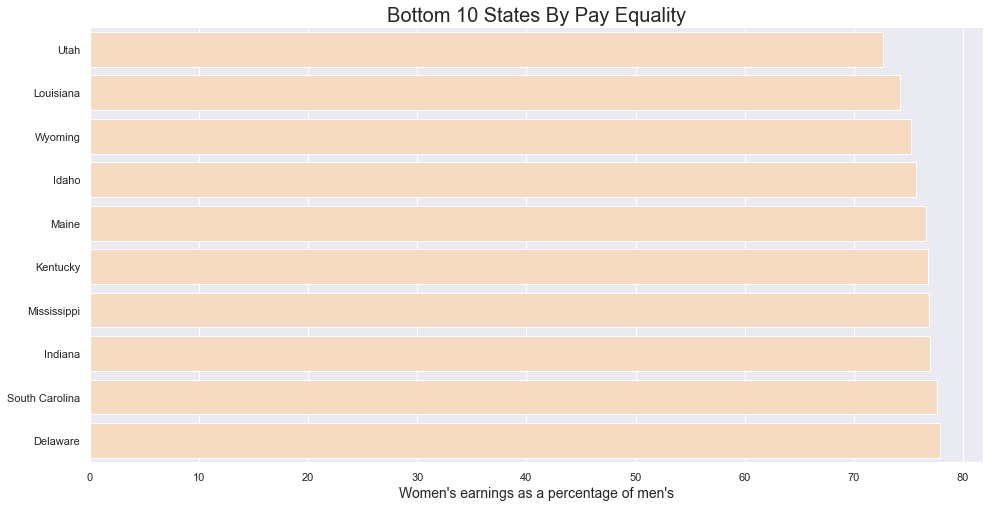

In [34]:
# visualize bottom 10 states by pay equality
sns.set_style("darkgrid")
sns.set_context("talk")
sns.set(rc={'figure.figsize': (16,8)})
sns.barplot(data=bottom.head(10), y='state', x='women_earnings_pct_of_men', color='peachpuff')
plt.title("Bottom 10 States By Pay Equality", size=20)
plt.xlabel("Women's earnings as a percentage of men's", size=14)
plt.ylabel(None)
plt.show()

In [35]:
# states with greatest % of women in workforce
pct_women_workforce=earnings_by_state[['state','pct_women_in_workforce']].sort_values(by='pct_women_in_workforce', ascending=False)
pct_women_workforce.head(10)

,state,pct_women_in_workforce
9,District of Columbia,50.160772
46,Vermont,49.769585
21,Maryland,48.442299
25,Mississippi,48.322148
11,Georgia,47.879464
19,Louisiana,47.563487
8,Delaware,46.927374
12,Hawaii,46.778043
41,South Carolina,46.765884
26,Missouri,46.752627


In [36]:
# states with least % of women in workforce
pct_women_workforce.tail(10)

,state,pct_women_in_workforce
29,Nevada,43.381643
44,Texas,43.250354
51,Wyoming,43.076923
5,California,43.056441
37,Oklahoma,42.529644
48,Washington,42.5
38,Oregon,41.715976
6,Colorado,41.533865
13,Idaho,40.646259
45,Utah,38.919926


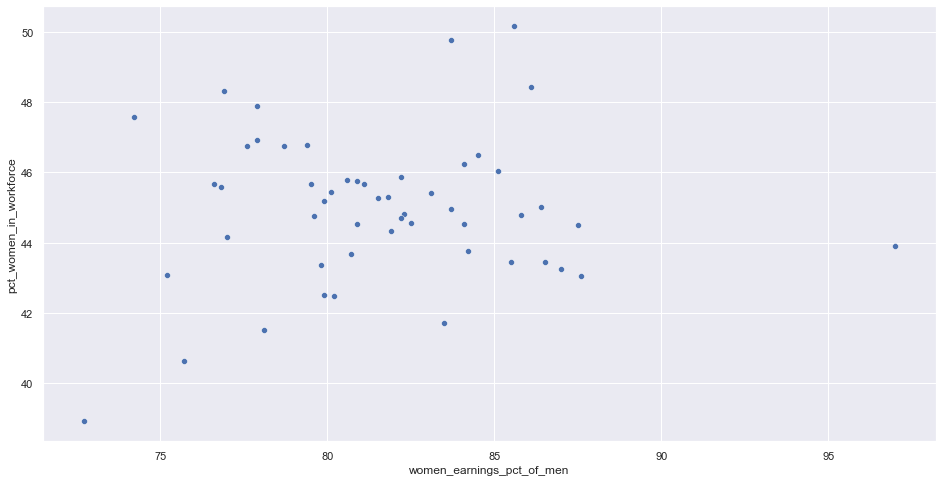

In [37]:
# what is the relationship between women earnings pct of men and pct women in workforce?
sns.set(rc={'figure.figsize': (16,8)})
ax=sns.scatterplot(data=earnings_by_state, x='women_earnings_pct_of_men', y='pct_women_in_workforce')
ax;
# positive correlation - of what strength?

In [38]:
# calculate correlation coefficient
corr = earnings_by_state[['women_earnings_pct_of_men','pct_women_in_workforce']].corr()
corr
# correlation coefficient = 0.07 - very weak 

,women_earnings_pct_of_men
women_earnings_pct_of_men,1.0


## Earnings & Abortions

In [39]:
# merge dataframes
merged_df=earnings_by_state.merge(ab_df, on='state')
merged_df.head()

,state,total_workers_in_thousands,total_median_weekly_earnings,women_workers_in_thousands,women_median_weekly_earnings,men_workers_in_thousands,men_median_weekly_earnings,women_earnings_pct_of_men,pct_women_in_workforce,"% change in abortion rate, 2017-2020","% of all U.S. abortions, by state of occurrence",% of residents obtaining abortions who traveled out of state for care,"No. of abortions per 1,000 women aged 15-44, by state of occurrence","No. of abortions per 1,000 women aged 15-44, by state of residence","No. of abortions, by state of occurrence","No. of abortions, by state of residence"
0,Alabama,1628,887,745,791,884,978,80.9,45.761671,-6.0,0.6,0.47,6.0,9.5,17100.0,9060.0
1,Alaska,238,1021,106,913,132,1128,80.9,44.537815,0.0,0.1,0.07,8.6,9.2,3720.0,1320.0
2,Arizona,2384,932,1073,856,1312,991,86.4,45.008389,1.0,1.4,0.06,9.3,9.7,39960.0,13820.0
3,Arkansas,995,849,443,771,552,917,84.1,44.522613,2.0,0.3,0.37,5.6,7.8,9750.0,4510.0
4,California,12544,1063,5401,993,7143,1133,87.6,43.056441,17.0,16.6,0.00,19.2,19.0,462180.0,152400.0


In [40]:
merged_df.columns

Index(['state', 'total_workers_in_thousands', 'total_median_weekly_earnings',
       'women_workers_in_thousands', 'women_median_weekly_earnings',
       'men_workers_in_thousands', 'men_median_weekly_earnings',
       'women_earnings_pct_of_men', 'pct_women_in_workforce',
       '% change in abortion rate, 2017-2020',
       '% of all U.S. abortions, by state of occurrence',
       '% of residents obtaining abortions who traveled out of state for care',
       'No. of abortions per 1,000 women aged 15-44, by state of occurrence',
       'No. of abortions per 1,000 women aged 15-44, by state of residence',
       'No. of abortions, by state of occurrence',
       'No. of abortions, by state of residence'],
      dtype='object')

### Correlation

In [41]:
# create correlation df of all variables
corr_df = merged_df.corr()
corr_df

,total_workers_in_thousands,total_median_weekly_earnings,women_workers_in_thousands,women_median_weekly_earnings,men_workers_in_thousands,men_median_weekly_earnings,women_earnings_pct_of_men,"% change in abortion rate, 2017-2020","% of all U.S. abortions, by state of occurrence",% of residents obtaining abortions who traveled out of state for care,"No. of abortions per 1,000 women aged 15-44, by state of occurrence","No. of abortions per 1,000 women aged 15-44, by state of residence","No. of abortions, by state of occurrence","No. of abortions, by state of residence"
total_workers_in_thousands,1.000000,0.110275,0.998905,0.143277,0.999323,0.075558,0.250117,0.096521,0.910619,-0.297640,0.284681,0.408949,0.911180,0.927745
total_median_weekly_earnings,0.110275,1.000000,0.110716,0.984050,0.109650,0.983431,0.358433,0.150582,0.212533,-0.170637,0.725754,0.611961,0.213892,0.194131
women_workers_in_thousands,0.998905,0.110716,1.000000,0.143689,0.996508,0.077158,0.246651,0.094429,0.915878,-0.295077,0.298001,0.427766,0.916360,0.932103
women_median_weekly_earnings,0.143277,0.984050,0.143689,1.000000,0.142623,0.944538,0.507089,0.149715,0.242905,-0.201368,0.742069,0.628932,0.244374,0.224031
men_workers_in_thousands,0.999323,0.109650,0.996508,0.142623,1.000000,0.074078,0.252410,0.098040,0.905066,-0.299159,0.273696,0.393432,0.905687,0.922875
men_median_weekly_earnings,0.075558,0.983431,0.077158,0.944538,0.074078,1.000000,0.197967,0.159982,0.177163,-0.145110,0.706974,0.602225,0.178484,0.159193
women_earnings_pct_of_men,0.250117,0.358433,0.246651,0.507089,0.252410,0.197967,1.000000,0.003146,0.273402,-0.248027,0.348630,0.289186,0.274667,0.264343
"% change in abortion rate, 2017-2020",0.096521,0.150582,0.094429,0.149715,0.098040,0.159982,0.003146,1.000000,0.176506,-0.505330,0.473661,0.278008,0.176723,0.129541
"% of all U.S. abortions, by state of occurrence",0.910619,0.212533,0.915878,0.242905,0.905066,0.177163,0.273402,0.176506,1.000000,-0.353234,0.485157,0.605593,0.999961,0.994396
% of residents obtaining abortions who traveled out of state for care,-0.297640,-0.170637,-0.295077,-0.201368,-0.299159,-0.145110,-0.248027,-0.505330,-0.353234,1.000000,-0.379577,-0.252282,-0.353720,-0.302940


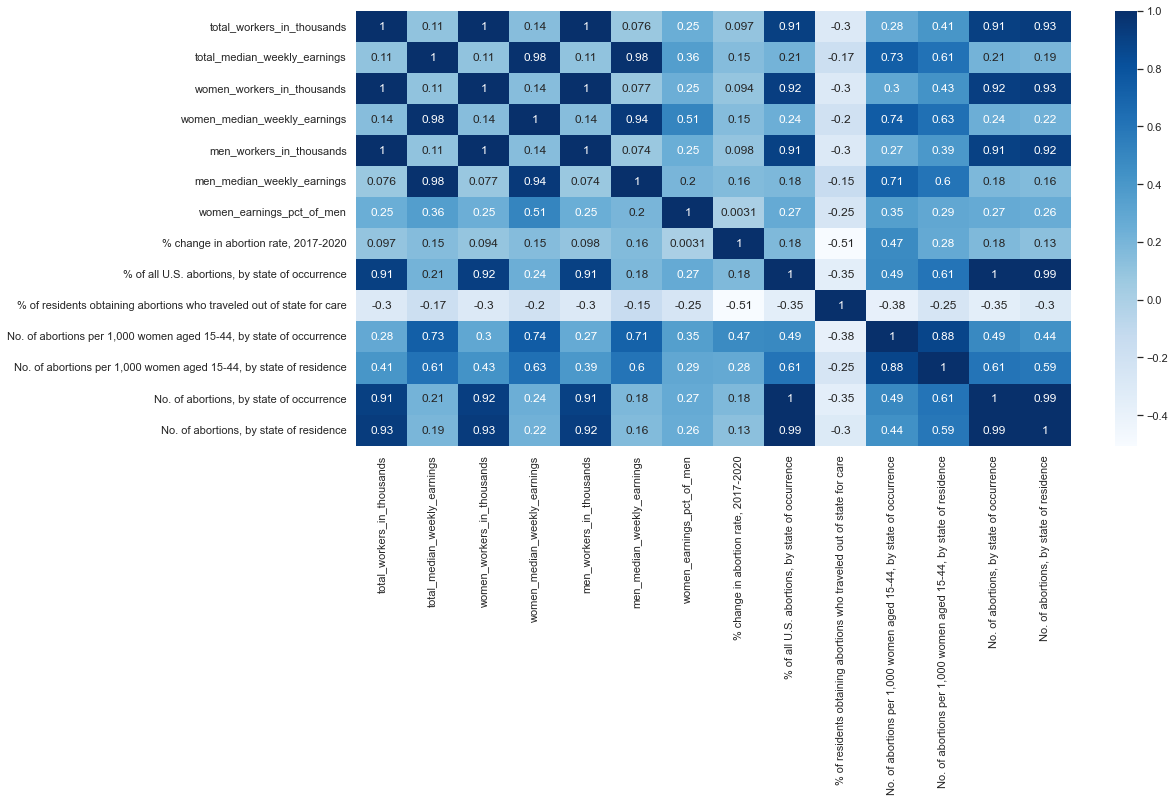

In [42]:
# create heatmap to better visualize
hm = sns.heatmap(corr_df, annot = True, cmap = 'Blues')

In [43]:
# create correlation df of specific varaibles
corr_df = merged_df[['women_workers_in_thousands', 'women_median_weekly_earnings', 'women_earnings_pct_of_men', 'pct_women_in_workforce', 
                     'No. of abortions per 1,000 women aged 15-44, by state of occurrence', 'No. of abortions per 1,000 women aged 15-44, by state of residence',
                     'No. of abortions, by state of occurrence', 'No. of abortions, by state of residence']].corr()
corr_df

,women_workers_in_thousands,women_median_weekly_earnings,women_earnings_pct_of_men,"No. of abortions per 1,000 women aged 15-44, by state of occurrence","No. of abortions per 1,000 women aged 15-44, by state of residence","No. of abortions, by state of occurrence","No. of abortions, by state of residence"
women_workers_in_thousands,1.000000,0.143689,0.246651,0.298001,0.427766,0.916360,0.932103
women_median_weekly_earnings,0.143689,1.000000,0.507089,0.742069,0.628932,0.244374,0.224031
women_earnings_pct_of_men,0.246651,0.507089,1.000000,0.348630,0.289186,0.274667,0.264343
"No. of abortions per 1,000 women aged 15-44, by state of occurrence",0.298001,0.742069,0.348630,1.000000,0.881842,0.485174,0.437388
"No. of abortions per 1,000 women aged 15-44, by state of residence",0.427766,0.628932,0.289186,0.881842,1.000000,0.605496,0.587868
"No. of abortions, by state of occurrence",0.916360,0.244374,0.274667,0.485174,0.605496,1.000000,0.994503
"No. of abortions, by state of residence",0.932103,0.224031,0.264343,0.437388,0.587868,0.994503,1.000000


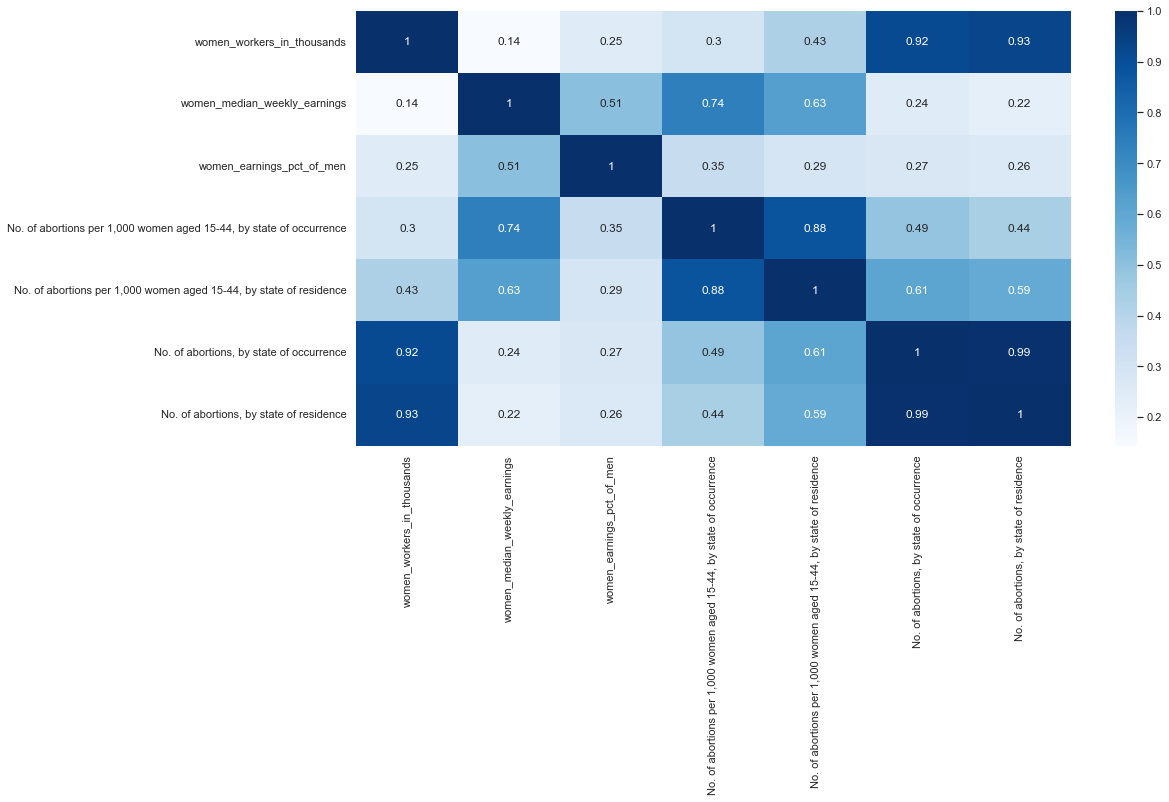

In [44]:
# create heatmap to better visualize
hm = sns.heatmap(corr_df, annot = True, cmap = 'Blues')
# very strong correlation between women workers and no. of abortions by state of occurence and residence
# moderate correlation between women median weekly earnings and no. of abortions per 1000 women aged 15-44 by staet of occurence and residence

In [45]:
# create correlation df of variables of note
corr_df = merged_df[['women_workers_in_thousands', 'women_median_weekly_earnings', 
                     'No. of abortions per 1,000 women aged 15-44, by state of occurrence', 'No. of abortions per 1,000 women aged 15-44, by state of residence',
                     'No. of abortions, by state of occurrence', 'No. of abortions, by state of residence']].corr()
corr_df

,women_workers_in_thousands,women_median_weekly_earnings,"No. of abortions per 1,000 women aged 15-44, by state of occurrence","No. of abortions per 1,000 women aged 15-44, by state of residence","No. of abortions, by state of occurrence","No. of abortions, by state of residence"
women_workers_in_thousands,1.000000,0.143689,0.298001,0.427766,0.916360,0.932103
women_median_weekly_earnings,0.143689,1.000000,0.742069,0.628932,0.244374,0.224031
"No. of abortions per 1,000 women aged 15-44, by state of occurrence",0.298001,0.742069,1.000000,0.881842,0.485174,0.437388
"No. of abortions per 1,000 women aged 15-44, by state of residence",0.427766,0.628932,0.881842,1.000000,0.605496,0.587868
"No. of abortions, by state of occurrence",0.916360,0.244374,0.485174,0.605496,1.000000,0.994503
"No. of abortions, by state of residence",0.932103,0.224031,0.437388,0.587868,0.994503,1.000000


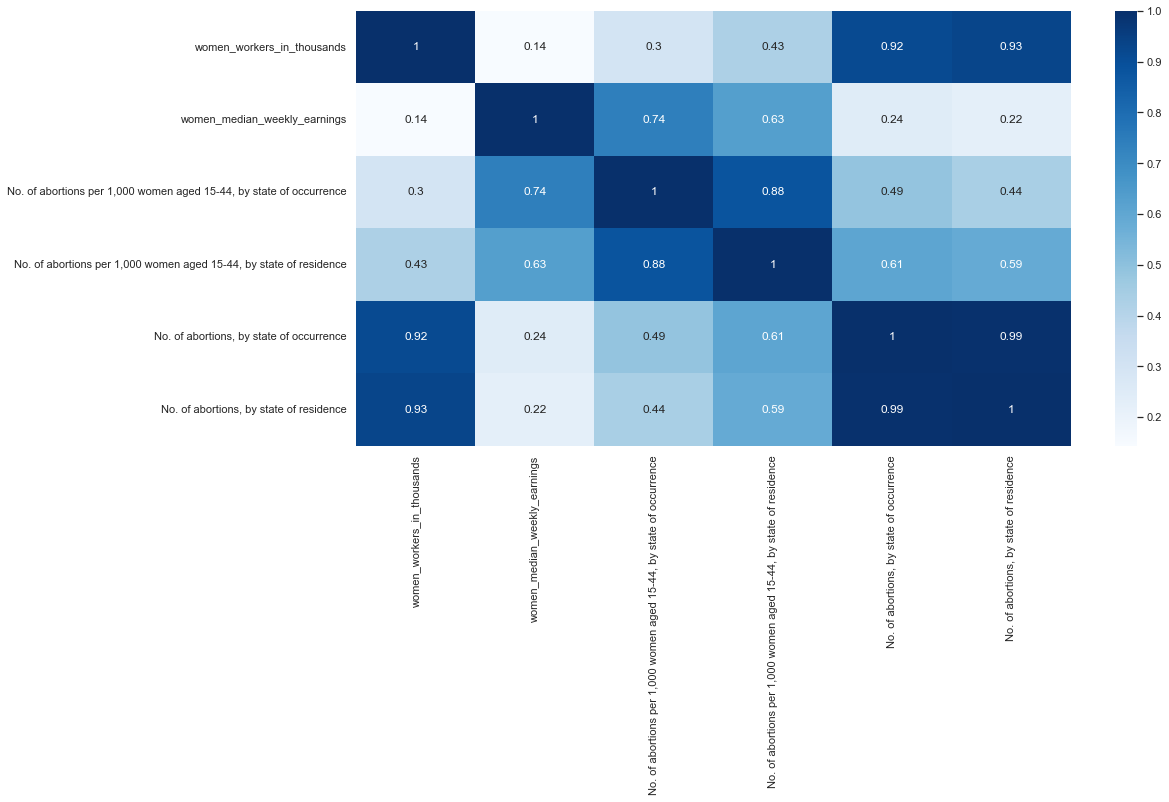

In [46]:
# create heatmap to better visualize
hm = sns.heatmap(corr_df, annot = True, cmap = 'Blues')

## State Abortion Laws

In [47]:
# read xlsx file
ab_laws = pd.ExcelFile("data/States_Abortion_Laws.xlsx")

# parse the third sheet
state_ab_laws = ab_laws.parse(0)

In [48]:
state_ab_laws.head()

,State,Category,Detailed Category
0,Washington,Protected,Expanded Access
1,Oregon,Protected,Expanded Access
2,California,Protected,Expanded Access
3,Minnesota,Protected,Expanded Access
4,Illinois,Protected,Expanded Access


### EDA

In [49]:
len(state_ab_laws)

54

In [50]:
# why 54?
state_ab_laws['State'].unique()
# US territories, including PR and Guam, are listed

array(['Washington', 'Oregon', 'California', 'Minnesota', 'Illinois',
       'New York', 'Vermont', 'Connecticut', 'New Jersey', 'Hawaii',
       'Montana', 'Nevada', 'Colorado', 'Kansas', 'Maine',
       'Massachusetts', 'Rhode Island', 'Delaware', 'Maryland', 'Florida',
       'Alaska', 'New Mexico', 'Virginia', 'New Hampshire', 'Puerto Rico',
       'North Dakota', 'Wyoming', 'Utah', 'Arizona', 'Nebraska', 'Iowa',
       'Wisconsin', 'Michigan', 'Indiana', 'Ohio', 'Pennsylvania',
       'North Carolina', 'South Carolina', 'Georgia',
       'Northern Mariana Islands', 'Guam', 'American Samoa', 'Idaho',
       'South Dakota', 'Missouri', 'Oklahoma', 'Texas', 'Arkansas',
       'Louisiana', 'Mississippi', 'Alabama', 'Tennesee', 'Kentucky'],
      dtype=object)

In [51]:
state_ab_laws.groupby('Category')['State'].count().sort_values(ascending=False)
# more than half (61%) of states are not protecting abortion laws

Category
Not Protected    33
Protected        21
Name: State, dtype: int64

In [52]:
state_ab_laws.groupby('Detailed Category')['State'].count().sort_values(ascending=False)
# 18/54 = 1/3 of states are hostile 
# just as many states are banning abortion as they are protecting abortion laws

Detailed Category
Hostile            18
Illegal            11
Protected          11
Expanded Access    10
Not Protected       4
Name: State, dtype: int64

## Earnings & Abortion Laws

In [53]:
# rename state column to merge
state_ab_laws.rename(columns={'State':'state'}, inplace=True)

In [54]:
# merge dataframes
merged_df2=earnings_by_state.merge(state_ab_laws, on='state')
merged_df2.head()

,state,total_workers_in_thousands,total_median_weekly_earnings,women_workers_in_thousands,women_median_weekly_earnings,men_workers_in_thousands,men_median_weekly_earnings,women_earnings_pct_of_men,pct_women_in_workforce,Category,Detailed Category
0,Alabama,1628,887,745,791,884,978,80.9,45.761671,Not Protected,Illegal
1,Alaska,238,1021,106,913,132,1128,80.9,44.537815,Protected,Protected
2,Arizona,2384,932,1073,856,1312,991,86.4,45.008389,Not Protected,Hostile
3,Arkansas,995,849,443,771,552,917,84.1,44.522613,Not Protected,Illegal
4,California,12544,1063,5401,993,7143,1133,87.6,43.056441,Protected,Expanded Access


### EDA

In [55]:
earnings_pct_by_law_cat=merged_df2.pivot_table(values='women_earnings_pct_of_men', index='Category', aggfunc=np.mean).sort_values(by='women_earnings_pct_of_men', ascending=False)
earnings_pct_by_law_cat
# states that protect abortion laws have 2% more pay equality than states that don't

,women_earnings_pct_of_men
Category,
Protected,82.861905
Not Protected,80.410714


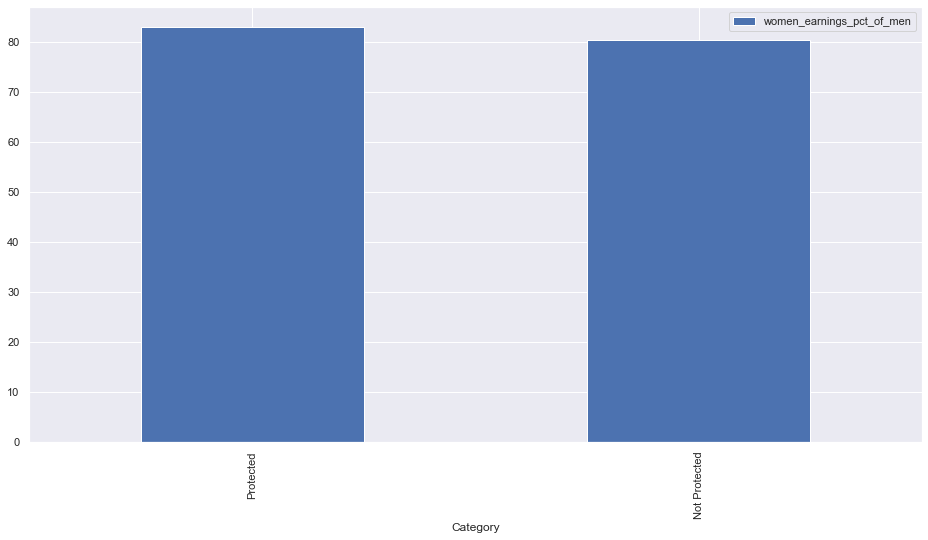

In [56]:
ax=earnings_pct_by_law_cat.plot(kind='bar')
ax;

In [57]:
earnings_pct_by_law_subcat=merged_df2.pivot_table(values='women_earnings_pct_of_men', index='Detailed Category', aggfunc=np.mean).sort_values(by='women_earnings_pct_of_men', ascending=False)
earnings_pct_by_law_subcat
# states that expand upon abortion laws have almost 5% more pay equality than states that ban abortion

,women_earnings_pct_of_men
Detailed Category,
Expanded Access,84.400000
Not Protected,83.166667
Protected,81.463636
Hostile,80.180000
Illegal,79.930000


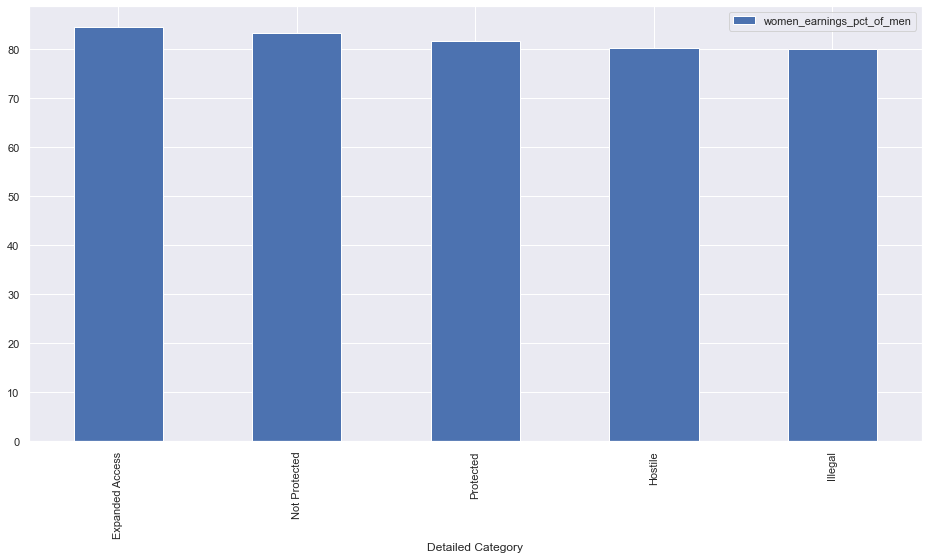

In [58]:
ax=earnings_pct_by_law_subcat.plot(kind='bar')
ax;